In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/connect4/connect4/

/content/drive/MyDrive/connect4/connect4


In [54]:
import sys
!{sys.executable} -m pip install --upgrade numpy

Requirement already up-to-date: numpy in /usr/local/lib/python3.7/dist-packages (1.21.0)


In [64]:
import numpy as np
from scipy import stats
import pandas as pd
from sklearn.utils import shuffle
from collections import Counter

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [66]:
import time

from board import Board
from player import MiniMaxPlayer, RandomPlayer


def play(player, opponent):
    player_1, player_2 = shuffle([player, opponent])
    board = Board(player_1, player_2)
    while not board.game_over:
        board.make_move()
    if board.winner == player:
        return "won", board.n_moves
    if board.winner == opponent:
        return "lost", board.n_moves
    else:
        return "draw", board.n_moves


def benchmark(player, n_runs=100):
    opponent = RandomPlayer(2)
    def time_solve():
        start = time.time()
        result, steps = play(player, opponent)
        t = time.time() - start
        return t, result, steps
    durations, results, steps = zip(*[time_solve() for _ in range(n_runs)])
    return durations, results, steps

def plot_results(durations, results, steps, name=''):
    n_runs = len(steps)
    wins = results.count("won")
    losses = results.count("lost")
    print("Won %d out of %d times. Lost %d times (avg %.2f secs (%d Hz), max %.2f secs)." % (
        wins, n_runs, losses, wins / n_runs, n_runs / sum(durations), max(durations)))
    steps_desc = stats.describe(steps)
    print("No. of steps", steps_desc)
    plt.hist(steps, bins=range(40), density=True)
    plt.xlabel('Number of Turns to win')
    plt.ylabel('Fraction of games')
    plt.title(f'Simulated lengths of connect4 games for {name}')


In [114]:
class Benchmark:
    def __init__(self, player, name='', n_runs=100):
        self.player = player
        self.opponent = RandomPlayer(2)
        self.n_runs = n_runs
        self.name = name

    def save(self, result):
        result.to_pickle(f'{self.name}.pkl')

    def load(self):
        return pd.DataFrame.frm_pickle(f'{self.name}.pkl')

    def play(self):
        player_1, player_2 = shuffle([self.player, self.opponent])
        board = Board(player_1, player_2)
        while not board.game_over:
            board.make_move()
        if board.winner == self.player:
            return "won", board.n_moves
        if board.winner == self.opponent:
            return "lost", board.n_moves
        else:
            return "draw", board.n_moves

    def run(self):
        def time_solve():
            start = time.time()
            result, steps = self.play()
            t = time.time() - start
            return t, result, steps
        durations, results, steps = zip(*[time_solve() for _ in range(self.n_runs)])
        return pd.DataFrame({'durations': durations, 'results': results, 'steps': steps})
    
    def plot(self, output):
        results = output['results']
        durations = output['durations']
        steps = output['steps']
        wins = output['results'].value_counts()['won']
        losses = output['results'].value_counts()['lost']
        print("Won %d out of %d times. Lost %d times (avg %.2f secs (%d Hz), max %.2f secs)." % (
            wins, self.n_runs, losses, wins / self.n_runs, self.n_runs / sum(durations), max(durations)))
        steps_desc = stats.describe(steps)
        print("No. of steps", steps_desc)
        ax = output.pivot(columns="results", values="steps").plot.hist(bins=range(40))
        ax.xlabel('Number of Turns to win')
        ax.ylabel('Fraction of games')
        ax.title(f'Simulated lengths of connect4 games for {self.name}')

# Random player

In [115]:
random_test = Benchmark(RandomPlayer(1), name='random_10000', n_runs=10000)
results = b.run()

Won 508 out of 10000 times. Lost 484 times (avg 0.05 secs (1950 Hz), max 0.02 secs).
No. of steps DescribeResult(nobs=1000, minmax=(7, 35), mean=20.796, variance=41.145529529529526, skewness=-0.01655069894657268, kurtosis=-0.6647332261144809)


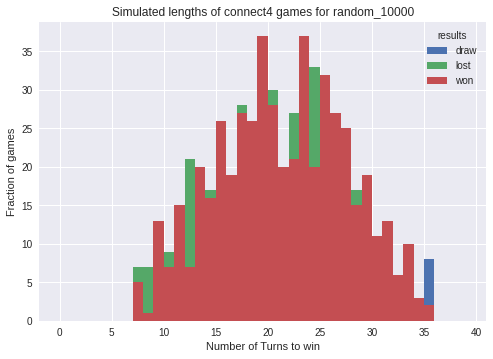

In [116]:
random_test.plot(results)

In [118]:
random_test.save(results)

## MinMax Player

In [119]:
minmax = Benchmark(MiniMaxPlayer(1), n_runs=10000)

In [ ]:
results = minmax.run()

Won 952 out of 1000 times. Lost 48 times (avg 0.95 secs (5 Hz), max 0.44 secs).
No. of steps DescribeResult(nobs=1000, minmax=(7, 28), mean=11.313, variance=16.005036036036035, skewness=1.1897644582827558, kurtosis=1.5002284091943947)


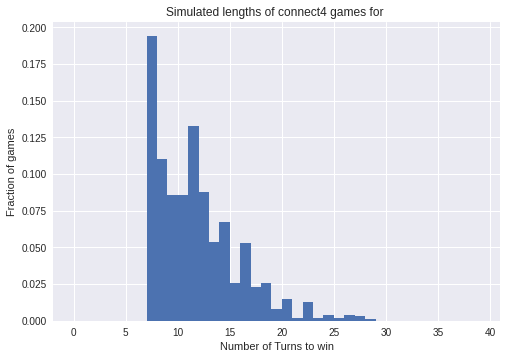

In [75]:
plot_results(durations, results, steps)

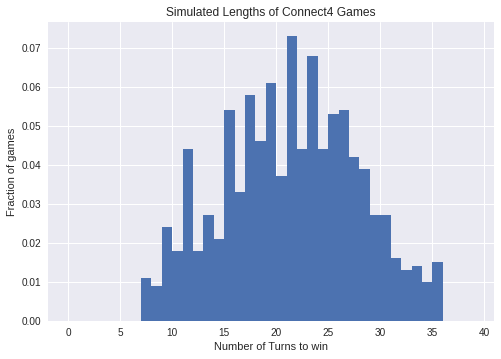

In [29]:
plt.hist(steps, bins=range(40), density=True)
plt.xlabel('Number of Turns to win')
plt.ylabel('Fraction of games')
plt.title('Simulated Lengths of Connect4 Games');